# Научный рейтинг

In [1]:
!date
!pwd

Пнд Июн  5 19:03:57 MSK 2017
/home/sphere/Analysis/SINP_data


In [2]:
%matplotlib inline
#import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
filename = './19.05.2017sinp.csv'
data = pd.read_csv(filename)
print(data.shape)
data[:4]

(325, 5)


,Unnamed: 0,FIO,Position,Department,Rating
0,1,Куприянов М.Ю.,Главный научный сотрудник,ОМЭ,2354
1,2,Смирнов В.А.,Ведущий научный сотрудник,ОТФВЭ,1346
2,3,Дудко Л.В.,Заведующий лабораторией,ОЭФВЭ,850
3,4,Боос Э.Э.,Заведующий отделом,ОЭФВЭ,677


In [4]:
rmin = data.Rating.min()
rmax = data.Rating.max()
print('Минимальное и максимальное значения рейтинга:', rmin, rmax)

Минимальное и максимальное значения рейтинга: 0 2354


In [5]:
print('сотрудников с рейтингом =   0 :', data.Rating[data.Rating == 0].count())
print('сотрудников с рейтингом > 700 :', data.Rating[data.Rating > 700].count())

сотрудников с рейтингом =   0 : 62
сотрудников с рейтингом > 700 : 3


## Характеристики отделов

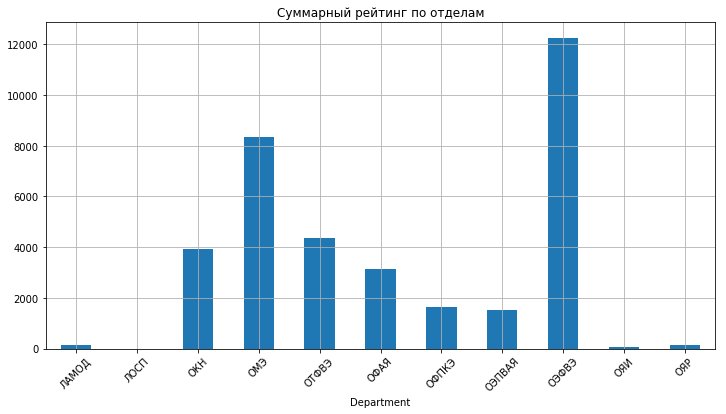

In [27]:
plt.figure(figsize=(12,6))
#data.groupby('Department').Rating.sum().sort_values(ascending = False).plot(kind='bar',rot=45, title = 'Суммарный рейтинг по отделам')
data.groupby('Department').Rating.sum().plot(kind='bar',rot=45, title = 'Суммарный рейтинг по отделам')
plt.grid();

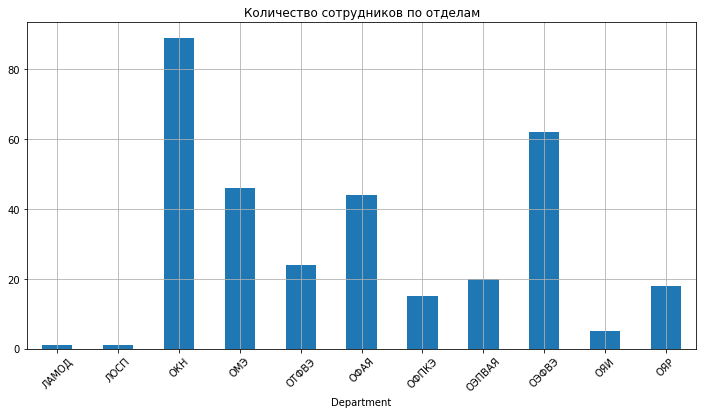

In [26]:
plt.figure(figsize=(12,6))
data.groupby('Department').Rating.count().plot(kind='bar',rot=45, title = 'Количество сотрудников по отделам')
plt.grid();

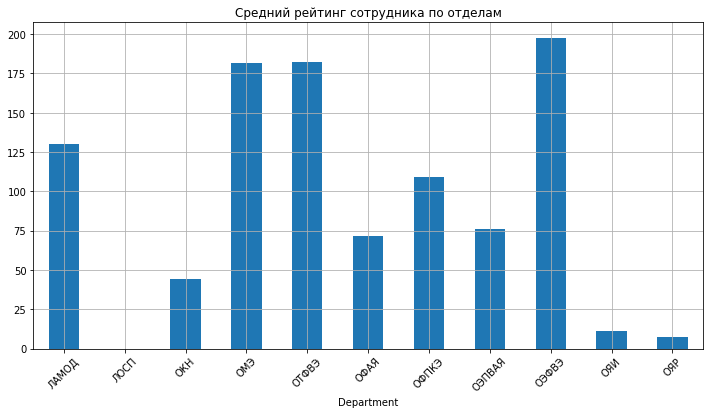

In [28]:
plt.figure(figsize=(12,6))
data.groupby('Department').Rating.mean().plot(kind='bar',rot=45, title = 'Средний рейтинг сотрудника по отделам')
plt.grid();

## Характеристики должностей

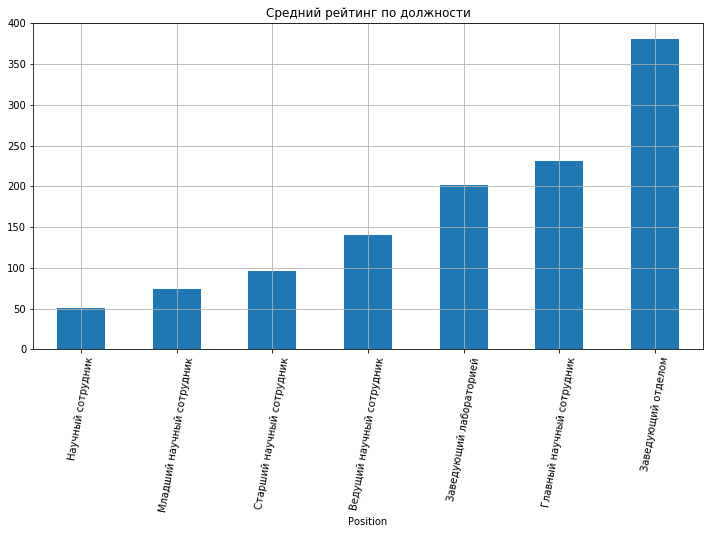

In [29]:
plt.figure(figsize=(12,6))
data.groupby('Position').Rating.mean().sort_values().plot(kind='bar',rot=80, title = 'Средний рейтинг по должности')
plt.grid();

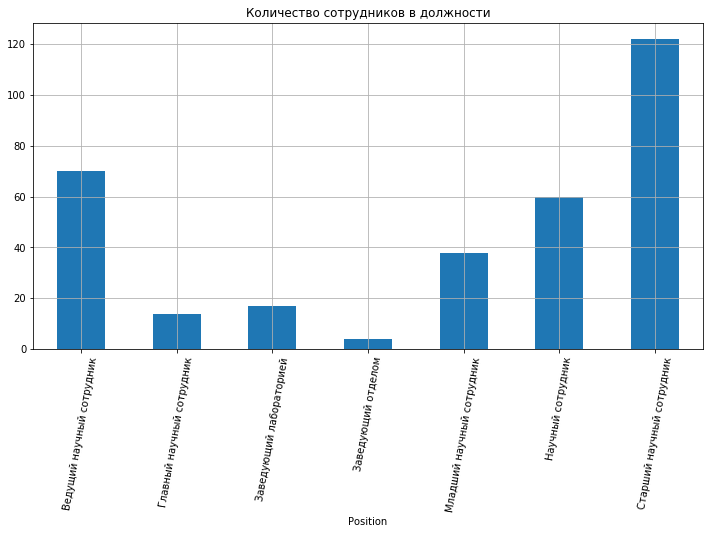

In [31]:
plt.figure(figsize=(12,6))
data.groupby('Position').Rating.count().plot(kind='bar',rot=80, title = 'Количество сотрудников в должности')
plt.grid();

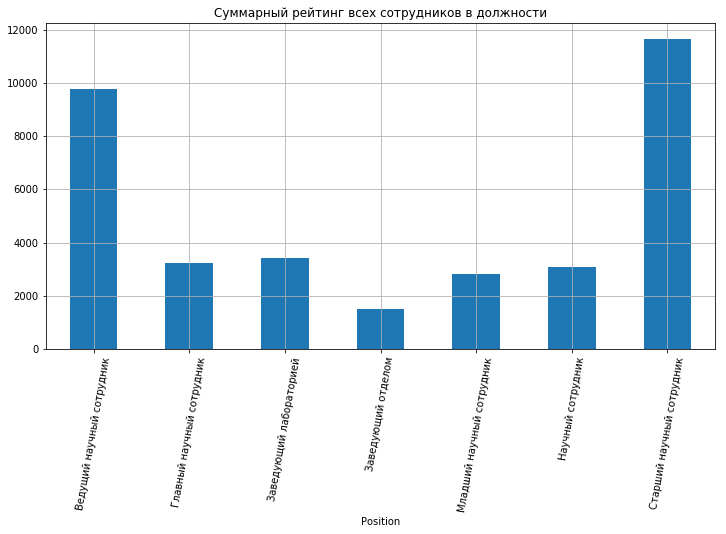

In [34]:
plt.figure(figsize=(12,6))
data.groupby('Position').Rating.sum().plot(kind='bar',rot=80, title = 'Cуммарный рейтинг всех сотрудников в должности')
plt.grid();

## Распределения рейтинга по институту

Построим распреление по институту в целом.

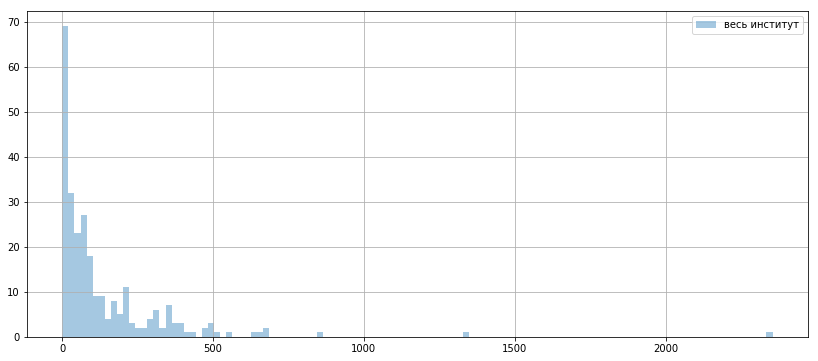

In [19]:
dx=(rmax-rmin)//20
plt.figure(figsize=(14,6))
plt.hist(data['Rating'], range=[rmin+1, rmax], bins=dx, alpha=0.4, label='весь институт')
plt.legend(loc=1)
plt.grid();

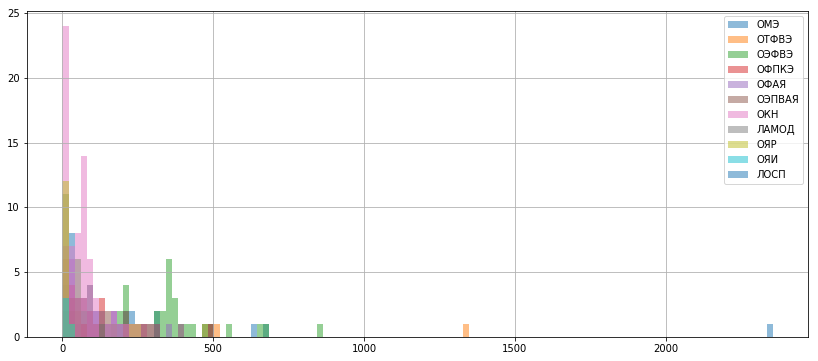

In [33]:
plt.figure(figsize=(14,6))
for i in data.Department.unique():
    plt.hist(data['Rating'][data.Department==i], range=[rmin+1, rmax], bins=dx, alpha=0.5, label=i)
plt.legend(loc=1)
plt.grid();

 ## Распределения рейтинга по отделам

Ограничимся диапазоном рейтинга от 1 до 900. Выше 900 рейтинг у двух сотрудников, нулевой - у 62.

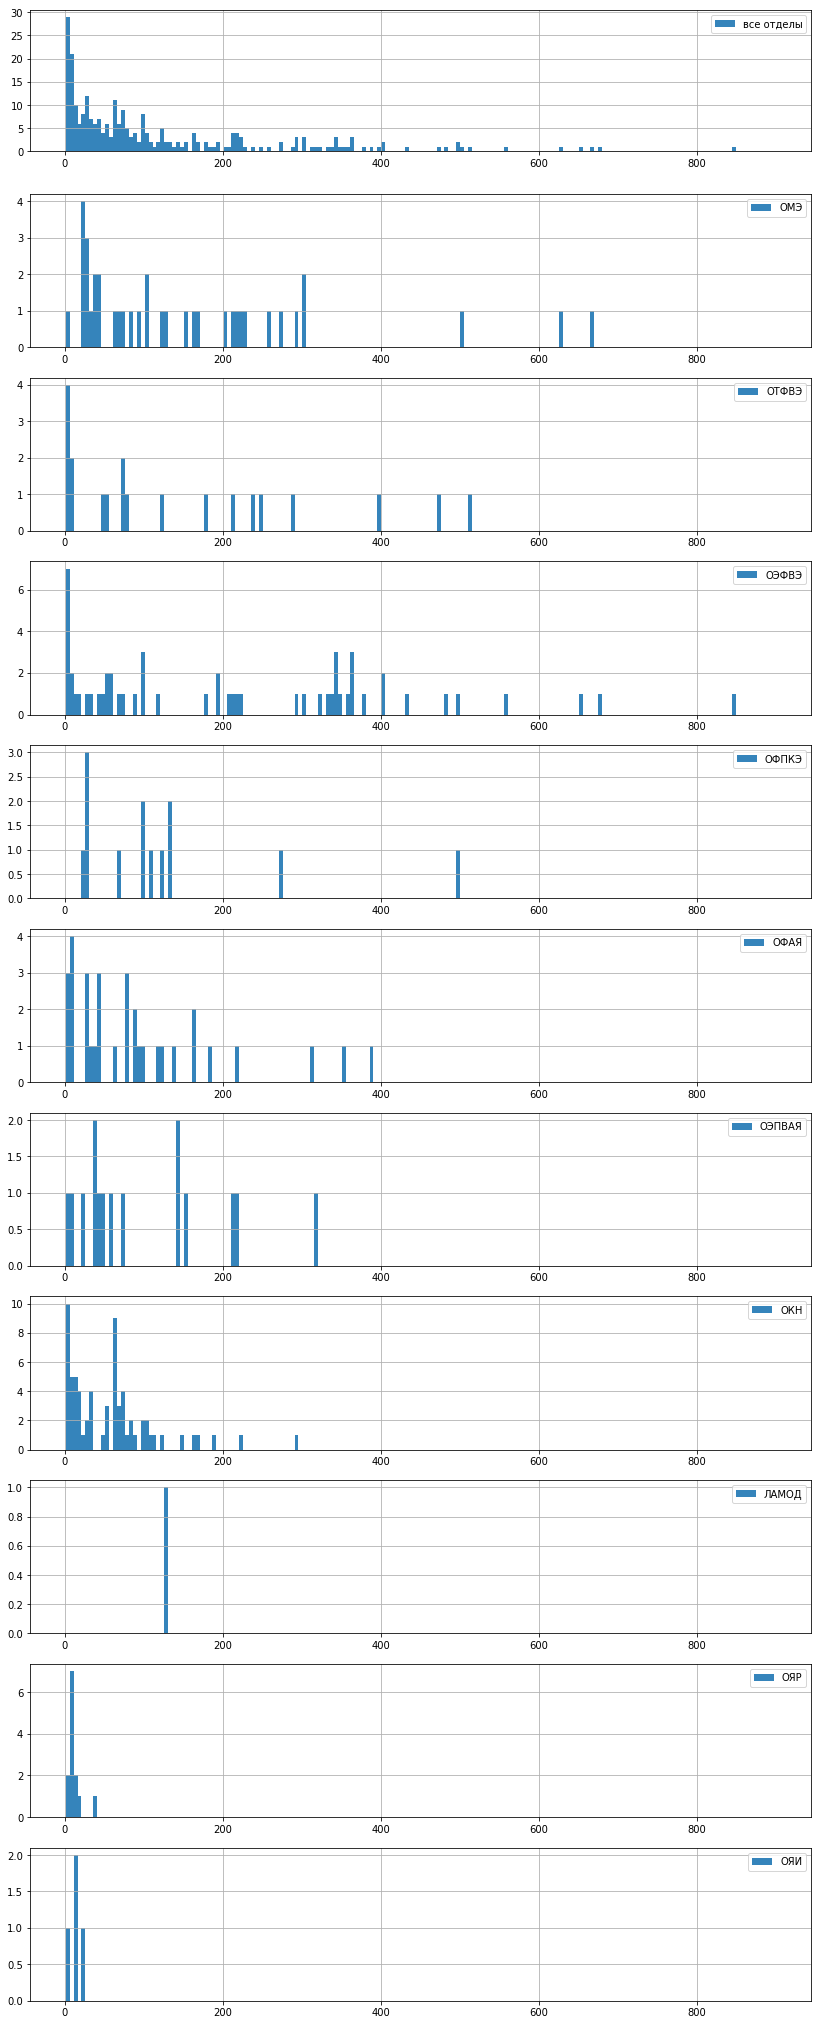

In [25]:
bins = 180
xmax = 900
plt.figure(figsize=(14,40))
plt.subplot(13,1,1)
plt.hist(data['Rating'],range=[1, xmax], bins=bins, alpha=0.9,  label='все отделы')
plt.legend(loc=1)
plt.grid()

for i in range(-1+len(data.Department.unique())):
    plt.subplot(12,1,2+i) 
    dep = data.Department.unique()[i]
    plt.hist(data['Rating'][data.Department==dep], range=[1, xmax], bins=bins,alpha=0.9,  label=dep)
    plt.legend(loc=1)
    plt.grid();

## Распределение рейтинга по должностям

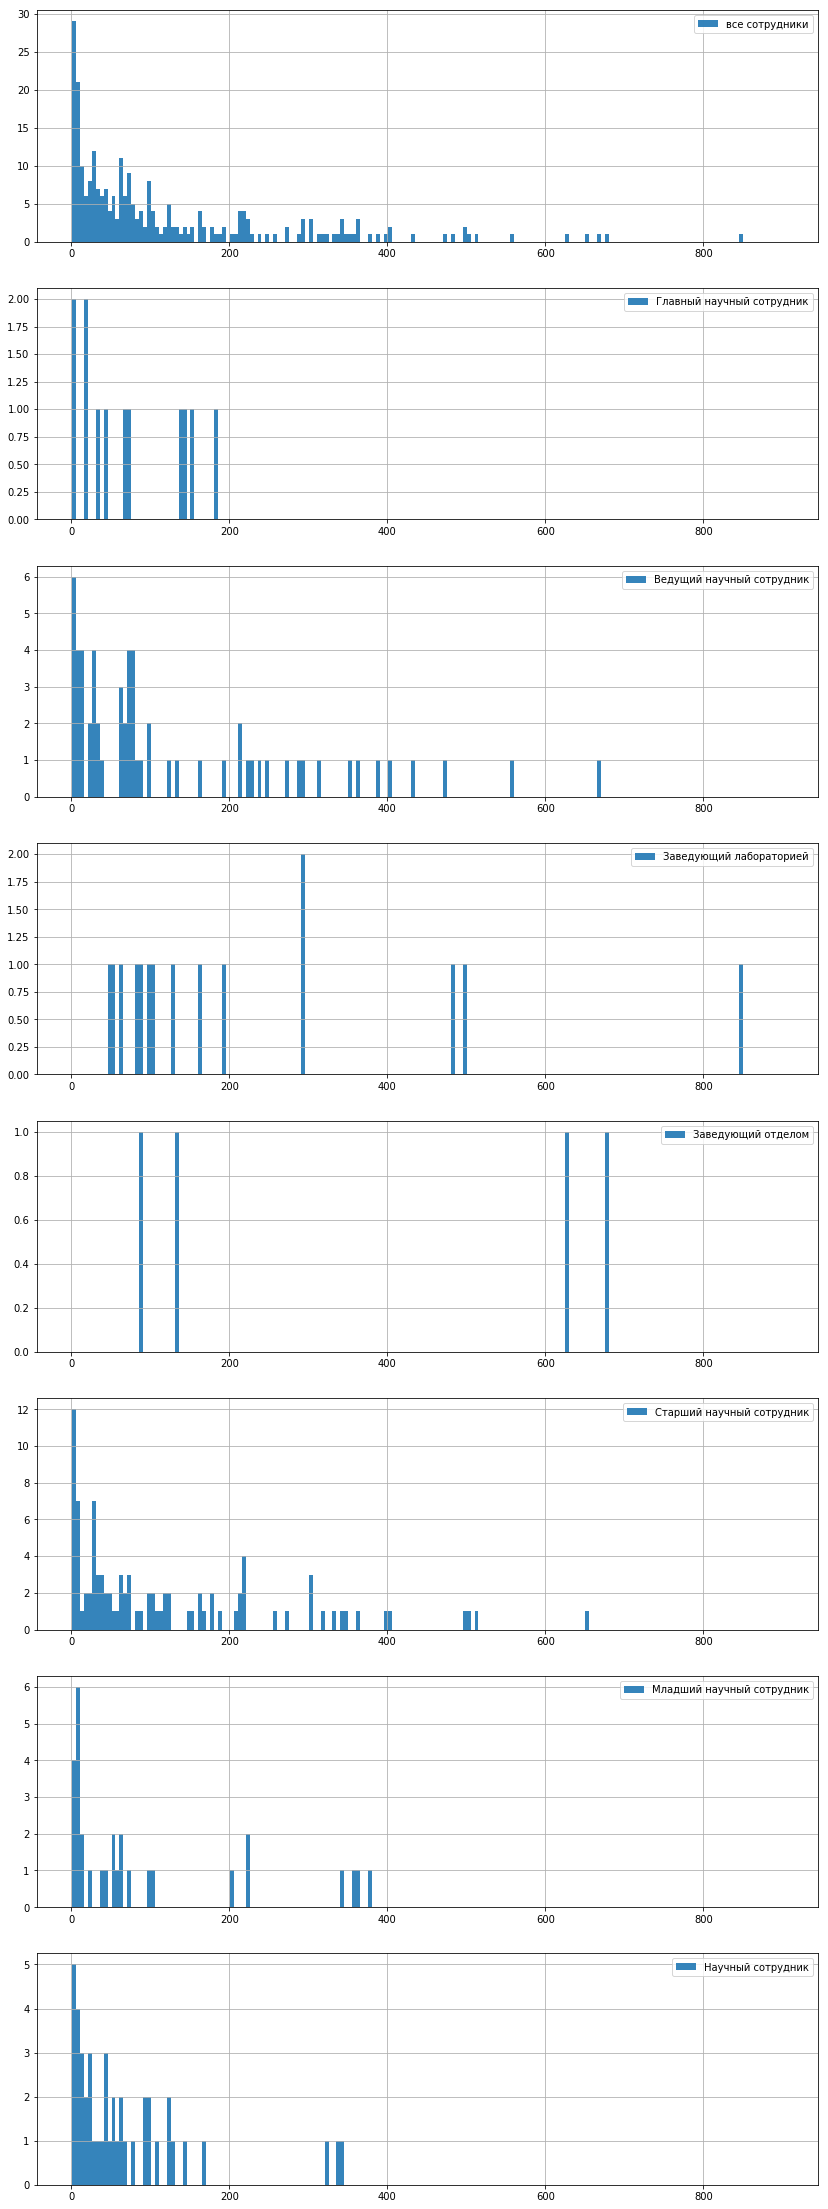

In [24]:
bins = 180
xmax = 900
size = len(data.Position.unique())
plt.figure(figsize=(14,40))
plt.subplot(size+1,1,1)
plt.hist(data['Rating'],range=[1, xmax], bins=bins, alpha=0.9,  label='все сотрудники')
plt.legend(loc=1)
plt.grid()

for i in range(size):
    plt.subplot(size+1,1,2+i) 
    dep = data.Position.unique()[i]
    plt.hist(data['Rating'][data.Position==dep], range=[1, xmax], bins=bins,alpha=0.9,  label=dep)
    plt.legend(loc=1)
    plt.grid()